##  SEIR-MODEL OF NON-KILLER DISEASE

The disease is considered to be non-killer and therefore death rate is considered to be the natural death rate.


#### Sources of the  values of the  parameters

1. http://www.stoptb.org/resources/cd/KEN_Dashboard.html

2. https://www.statista.com/statistics/976967/crude-birth-rate-in-kenya/

3. https://www.indexmundi.com/kenya/demographics_profile.html

4. https://www.who.int/3by5/TBfactsheet.pdf 

### **Remarks**

$\rightarrow$ Exposed number of individuals was estimated, and the same applies to the rate of transition from exposed to infections.

$\rightarrow$ Death rate - $\frac{1}{70}=0.014$

$\rightarrow$ The total birth rate was calculated as follows:-

 -using the rate of birth rate per woman in life time which is 3.43, per year is $\frac{3.43}{70}= 0.049$ where, 70years is the life expectancy.
 
 -number of women $=27,000,000$
 
 -total population $= 52,570,000$
 
 Therefore, total births in a year $= 0.049\times 27,000,000=1,323,000$
 
 Birth rate (b) $=  \frac{1,323,000}{52,570,000}=0.02517$
 
$\rightarrow$ Infection rate $=\frac{140000}{52,570,000}=0.002663$, where $140,000$ are infectives.

$\rightarrow$ Recovery rate is the inverse of the disease duration. Therefore, taking disease duration to be atleast $6~months$ and thus:-
  
  -Recovery rate $=\frac{1}{186}\times 365= 1.96$ per year per person
   

 ### - Model without immigration  (Nominal system/unperturbed system)

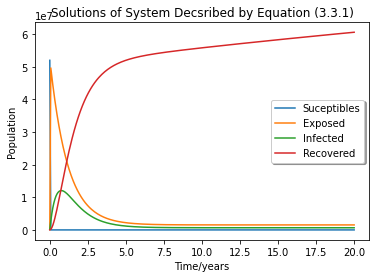

In [4]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# z-unperturbed system

def tuberclosis_KE(t, z, gamma=0.002663, alpha=1.96, delta=0.014, k= 0.85, b=1323000):
    '''
    This function accepts the following:-
    t       - Time duration
    z       - Different group of the system, for our case it is S-Susceptibles, E-Exposed, I-Infected, R-Recovered
    gamma   - Infection rate
    alpha   - Recovery rate
    delta   - Death rate
    k       - Rate of transition from exposed to infections.
    $b$     - Total birth rate.
    and returns the respective population number.
    '''
    
    S,E,I,R = z
    return [b- delta*S - S*I*gamma, gamma*S*I - (delta+k)*E, k*E - (delta+alpha)*I, alpha*I-delta*R]

#Solving differential equations given initial condition
sol = solve_ivp(tuberclosis_KE, [0, 20], [52010000,420000,140000, 0], args=(0.002663,1.96,0.014,0.85,1323000),
                dense_output=True)

#Computing solution
t = np.linspace(0,20, 300)
z = sol.sol(t)

#Plotting the solution
plt.plot(t, z.T)
plt.xlabel('Time/years')
plt.ylabel('Population')
plt.legend(['Suceptibles', 'Exposed', 'Infected', 'Recovered'], shadow=True)
plt.title('Solutions of System Decsribed by Equation (3.3.1)')
plt.savefig("solution_1")
plt.show()

### - Model with immigration (Perturbed system)

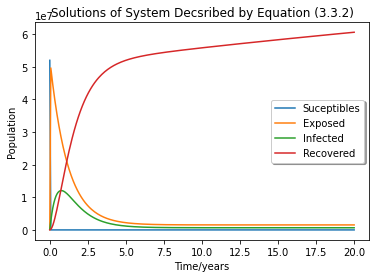

In [5]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# z-unperturbed system

def tuberclosis_KEP(t, z, gamma=0.002663, alpha=1.96, delta=0.014, k= 0.85, b=1323000,m=100, n=15):
    '''
    This function accepts the following:-
    t       - Time duration
    z       - Different group of the system, for our case it is S-Susceptibles, E-Exposed, I-Infected, R-Recovered
    gamma   - Infection rate
    alpha   - Recovery rate
    delta   - Death rate
    k       - Rate of transition from exposed to infections.
    $b$     - Total birth rate.
    m       - Number of immigrants into exposed group
    n       - Number of immigrants into infected group
    and returns the change in respective populations groups.
    '''     
    S,E,I,R = z
    return [b- delta*S - S*I*gamma, gamma*S*I - (delta+k)*E+m, k*E - (delta+alpha)*I+n, alpha*I-delta*R]

#Solving differential equations given initial condition
sol = solve_ivp(tuberclosis_KEP, [0, 20], [52010000,420000,140000, 0], args=(0.002663,1.96,0.014,0.85,1323000),
                dense_output=True)

#Computing solution.
t = np.linspace(0,20, 300)
z_p = sol.sol(t)

#Plotting the solution.
plt.plot(t, z_p.T)
plt.xlabel('Time/years')
plt.ylabel('Population')
plt.legend(['Suceptibles', 'Exposed', 'Infected', 'Recovered'], shadow=True)
plt.title('Solutions of System Decsribed by Equation (3.3.2)')
plt.savefig("solution_2")
plt.show()

### Difference (Error) in the infected and exposed group.

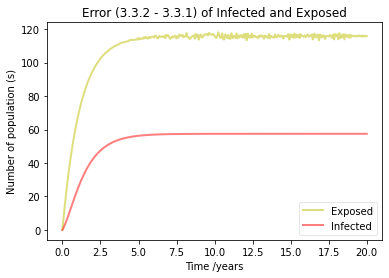

In [6]:
#Calculation of error.
error=z_p-z
S,E,I,R=error

#Plotting error in infected and exposed group after immigration.
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111,  axisbelow=True)
ax.plot(t, E, 'y', alpha=0.5, lw=2, label='Exposed')
ax.plot(t, I, 'r', alpha=0.5, lw=2, label='Infected')
ax.set_xlabel('Time /years')
ax.set_ylabel('Number of population (s)')
ax.set_title('Error (3.3.2 - 3.3.1) of Infected and Exposed')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
plt.savefig("solution_3") 
plt.show()
   